<h3>Understanding the Target Variable</h3>
<h2>Q16: Which of the following statements about electric cars suits you the best ?</h2>
<ul>
  <li><strong>A:</strong> If I had an EV, it would be my only car </li>
  <li><strong>B:</strong> If I had an EV, it would be a supplement to a petrol or diesel car</li>
  <li><strong>C:</strong> I would never buy an EV</li>
  <li><strong>D:</strong> Don't know</li>
  
</ul>

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
df = pd.read_excel('Data.xls')
df.replace('?', np.nan, inplace=True)

## Data Preprocessing

### Data Analysis

In [3]:
df.describe()

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,...,Q18_16,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21
count,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,...,4648.000000,4892.000000,5081.000000,4387.000000,5010.000000,4439.000000,4408.000000,4657.000000,6108.000000,6108.000000
mean,0.479044,0.295678,0.178782,0.584152,0.280779,0.089555,0.379993,0.302227,0.076130,0.433366,...,2.463640,3.042723,2.241094,3.064053,2.334132,2.812570,2.485254,2.492162,2.870825,2.596758
std,0.499602,0.456384,0.383201,0.492908,0.449417,0.285566,0.485425,0.459261,0.265227,0.495581,...,1.071357,1.132418,1.026773,1.143490,1.129883,1.085574,1.063135,1.062275,0.811442,0.834790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
df["Q16"].value_counts()

Q16
A    2883
B    1526
C     892
D     807
Name: count, dtype: int64

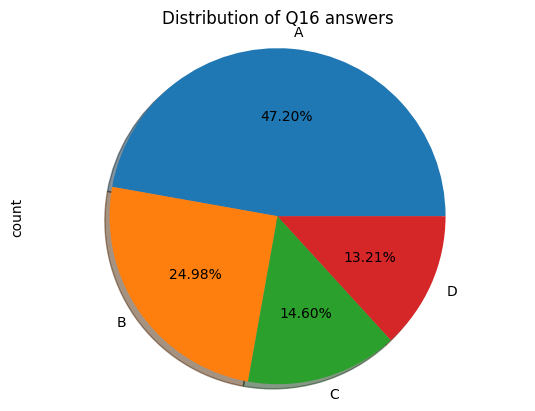

In [5]:

labels = ["A", "B", "C", "D"]  

df["Q16"].value_counts().plot.pie(autopct="%1.2f%%", shadow=True, labels=labels)

plt.title('Distribution of Q16 answers')

plt.axis('equal')
plt.show()

As we can see our data set is imbalanced

### Removing D class from the dataset
Since the meaning of the D class is "I dont know" it doesnt proivede any knowladge to our classifier also it ruins the ordinal relationship between other class beacuse D is totaly sperate from the other classes. Deleting 807 rows in 6108 data might be too much but we will fix this by oversampling.

In [6]:
df = df[df['Q16'] != 'D'].reset_index(drop=True)

### Taking care of missing data

In [7]:
df.fillna(df.mode().iloc[0], inplace=True) #replacing the nan values with the mode of each colmun

### Removing logic errors

1) In column 'Q12_14,' it states 'I would never buy an EV.' If a person answered 1 (yes) to this question and at the same time selected option 'A' for 'Q16,' this is a logic error, indicating that the person filled out the survey inconsistently.

In [8]:
condition = (df['Q16'] == 'A') & (df['Q12_14'] == 1)
df = df[~condition]

In [9]:
print("Number of rows in the DataFrame:", df.shape[0])

Number of rows in the DataFrame: 5220


2) In column 'Q18_14,' it states 'An electric car is only suitable for car number two.' If a person answered 1 (yes) to this question and at the same time selected option 'A' for 'Q16,' this is a logic error, indicating that the person filled out the survey inconsistently.

In [10]:
condition = (df['Q16'] != 'B') & (df['Q18_14'] == 1)
df = df[~condition]

In [11]:
print("Number of rows in the DataFrame:", df.shape[0])

Number of rows in the DataFrame: 5018


3) In column 'Q17,' it states 'If you only had an electric car, how good or bad do you think it would suit your daily driving needs?' If a person answered 4 (bad) or 5 (very bad) to this question and at the same time selected option 'A' for 'Q16,' this is a logic error, indicating that the person filled out the survey inconsistently.

In [12]:
condition = (df['Q16'] == 'A') & ((df['Q17']== 5) | (df['Q17']== 4)) 
df = df[~condition]

In [13]:
print("Number of rows in the DataFrame:", df.shape[0])

Number of rows in the DataFrame: 4960


### Removing unimportant Features

For questions Q12_13, Q11_13, and Q13_15, respondents can provide a custom response, stating 'another reason, not mentioned in this list.' Even if participants answer 'yes,' the diversity of responses makes it challenging to extract valuable knowledge for our classifier. As a result, we decided to remove these features from the dataset.

In [14]:
df.drop(columns=["Q12_13","Q11_13","Q13_15"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4960 entries, 0 to 5300
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Q11_1          4960 non-null   int64  
 1   Q11_2          4960 non-null   int64  
 2   Q11_3          4960 non-null   int64  
 3   Q11_4          4960 non-null   int64  
 4   Q11_5          4960 non-null   int64  
 5   Q11_6          4960 non-null   int64  
 6   Q11_7          4960 non-null   int64  
 7   Q11_8          4960 non-null   int64  
 8   Q11_9          4960 non-null   int64  
 9   Q11_10         4960 non-null   int64  
 10  Q11_11         4960 non-null   int64  
 11  Q11_12         4960 non-null   int64  
 12  Q11_Dont_Know  4960 non-null   int64  
 13  Q12_1          4960 non-null   int64  
 14  Q12_2          4960 non-null   int64  
 15  Q12_3          4960 non-null   int64  
 16  Q12_4          4960 non-null   int64  
 17  Q12_5          4960 non-null   int64  
 18  Q12_6        

In [15]:
df["Q16"].value_counts()

Q16
A    2663
B    1526
C     771
Name: count, dtype: int64

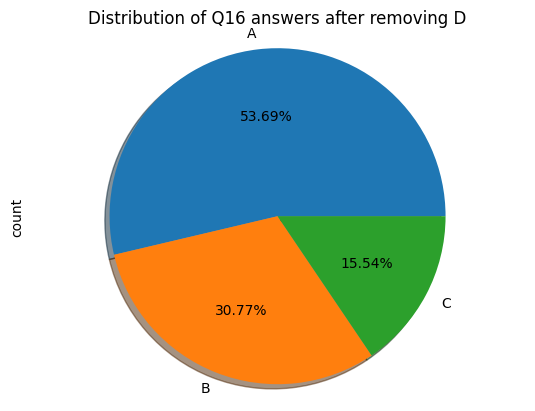

In [16]:
labels = ["A", "B", "C"]  

df["Q16"].value_counts().plot.pie(autopct="%1.2f%%", shadow=True, labels=labels)

plt.title('Distribution of Q16 answers after removing D')

plt.axis('equal')
plt.show()

## Balancing the imbalanced data

In [17]:
from imblearn.over_sampling import SMOTE

random_over_sampler = SMOTE(random_state=42)

y = df['Q16']
X = df.drop(['Q16'],axis=1)

X_resampled , y_resampled = random_over_sampler.fit_resample(X,y)
#generating data
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Q16'] = y_resampled

In [18]:
balanced_df["Q16"].value_counts()

Q16
A    2663
C    2663
B    2663
Name: count, dtype: int64

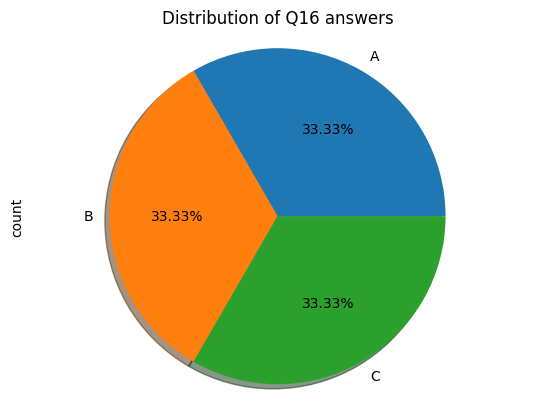

In [19]:
labels = ["A", "B", "C"]  

balanced_df["Q16"].value_counts().plot.pie(autopct="%1.2f%%", shadow=True, labels=labels)

plt.title('Distribution of Q16 answers')

plt.axis('equal')
plt.show()

In [20]:
balanced_df.head(10)

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,...,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
0,0,0,0,1,1,0,0,1,0,0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3,3,A
1,1,1,0,1,0,0,1,1,0,1,...,4.0,4.0,3.0,2.0,4.0,2.0,4.0,4,1,A
2,0,0,0,0,0,0,0,0,0,0,...,3.0,2.0,3.0,2.0,3.0,2.0,3.0,3,3,C
3,0,1,0,0,0,0,0,0,0,0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3,3,B
4,1,0,0,1,1,0,1,1,0,1,...,5.0,1.0,5.0,3.0,5.0,3.0,3.0,3,1,A
5,1,0,1,0,1,1,1,0,0,1,...,3.0,2.0,5.0,5.0,5.0,5.0,5.0,5,1,A
6,1,1,0,0,0,0,1,1,0,0,...,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1,2,A
7,1,1,0,1,1,0,1,0,0,1,...,4.0,2.0,3.0,2.0,3.0,2.0,2.0,3,2,A
8,0,1,0,1,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,3.0,2.0,1.0,1,4,B
9,1,0,0,0,1,0,1,1,0,1,...,4.0,2.0,2.0,1.0,2.0,2.0,4.0,4,2,A


## Encoding the dependent variable

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
balanced_df['Q16'] = le.fit_transform(balanced_df['Q16'])

A:0 B:1 C:2

In [22]:
balanced_df.head(20)

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,...,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
0,0,0,0,1,1,0,0,1,0,0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3,3,0
1,1,1,0,1,0,0,1,1,0,1,...,4.0,4.0,3.0,2.0,4.0,2.0,4.0,4,1,0
2,0,0,0,0,0,0,0,0,0,0,...,3.0,2.0,3.0,2.0,3.0,2.0,3.0,3,3,2
3,0,1,0,0,0,0,0,0,0,0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3,3,1
4,1,0,0,1,1,0,1,1,0,1,...,5.0,1.0,5.0,3.0,5.0,3.0,3.0,3,1,0
5,1,0,1,0,1,1,1,0,0,1,...,3.0,2.0,5.0,5.0,5.0,5.0,5.0,5,1,0
6,1,1,0,0,0,0,1,1,0,0,...,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1,2,0
7,1,1,0,1,1,0,1,0,0,1,...,4.0,2.0,3.0,2.0,3.0,2.0,2.0,3,2,0
8,0,1,0,1,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,3.0,2.0,1.0,1,4,1
9,1,0,0,0,1,0,1,1,0,1,...,4.0,2.0,2.0,1.0,2.0,2.0,4.0,4,2,0


In [23]:
balanced_df.describe()

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,...,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
count,7989.000000,7989.000000,7989.000000,7989.000000,7989.000000,7989.000000,7989.000000,7989.000000,7989.000000,7989.000000,...,7989.000000,7989.000000,7989.000000,7989.00000,7989.000000,7989.000000,7989.000000,7989.000000,7989.000000,7989.000000
mean,0.399925,0.240831,0.129803,0.515334,0.206659,0.063087,0.326324,0.244211,0.053198,0.356490,...,3.004049,2.218521,3.007314,2.29779,2.829331,2.334757,2.572990,2.805357,2.637251,1.000000
std,0.489913,0.427615,0.336108,0.499796,0.404934,0.243134,0.468897,0.429645,0.224442,0.478992,...,0.939476,0.901260,0.911713,0.98238,0.877172,0.893365,0.929816,0.763653,0.780871,0.816548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.479939,2.000000,3.000000,2.00000,2.086920,2.000000,2.000000,2.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,3.000000,2.00000,3.000000,2.000000,3.000000,3.000000,3.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,3.702651,3.000000,3.120882,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000


## Creating X(independent) and Y(dependent)

In [24]:
y = balanced_df['Q16'].values
X = balanced_df.drop(['Q16'],axis=1).values

## Spliting the dataset into the training set and test set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
print(X_train.shape)
print(X_test.shape)

(6391, 71)
(1598, 71)


## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Baseline Function To Evaluate Metrics

In [28]:
from sklearn.metrics import classification_report, matthews_corrcoef, roc_curve, auc, accuracy_score 

def evaluatePerformance(classifier):
    #Fit the model
    classifier.fit(X_train, y_train)

    #predict the x test
    y_pred = classifier.predict(X_test)
    
    #Calculating the mcc value
    mcc = matthews_corrcoef(y_test, y_pred)

    #Calculating the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    #print the classifiaction report
    classification_report_result = classification_report(y_test, y_pred)
    print("Classification Report:\n", classification_report_result)
    print(f"Matthews Corrcoef: {mcc: .4f}", )
    print(f"Accuracy Score: {accuracy: .4f}")


    #Ploting the ROC curve (one vs all)
    for class_label in range(len(set(y))):
        classifier.fit(X_train, (y_train == class_label).astype(int))

        y_score = classifier.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_score)
        roc_auc = auc(fpr, tpr)
        label = f'{classifier.__class__.__name__} (Class {class_label}, AUC = {roc_auc:.2f})'
        plt.plot(fpr, tpr, label=label)


    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Classification Algorithms (Multi-Class)')
    plt.legend()
    plt.show()



## Baseline Function To Perform Cross Validation

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def evaluatePerformance_crossVal(classifier):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Store accuracy scores
    accuracy_scores = []

    fold_number = 1
    for train_index, test_index in kf.split(X): # in regular kFold we only need to proivde the X(features) but if we were to use StratifiedKFold we should have proivded both X and y: skf.split(X, y)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        # Apply standard scaling to the training data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        
        # Use the same scaler to transform the test data
        X_test= scaler.transform(X_test)
    
        # Fit the model on the scaled training data
        classifier.fit(X_train, y_train)
    
        # predicting the X_test
        y_pred = classifier.predict(X_test)
    
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {fold_number}. fold: {accuracy:.4f}")
        accuracy_scores.append(accuracy)
        fold_number += 1
    
    
    print(f'Cross Validation Mean Accuracy: {np.mean(accuracy_scores):.4f}')
        

## Evalutaing the performance of the models


Evaluation for RandomForestClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       518
           1       0.83      0.72      0.77       549
           2       0.93      0.94      0.94       531

    accuracy                           0.84      1598
   macro avg       0.84      0.84      0.84      1598
weighted avg       0.84      0.84      0.84      1598

Matthews Corrcoef:  0.7632
Accuracy Score:  0.8404


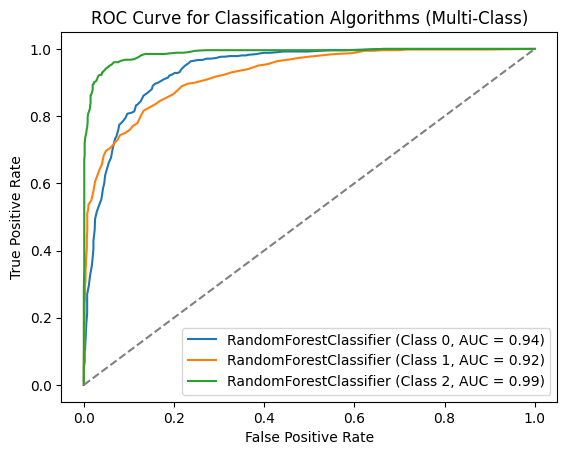

Accuracy for 1. fold: 0.8429
Accuracy for 2. fold: 0.8254
Accuracy for 3. fold: 0.8423
Accuracy for 4. fold: 0.8254
Accuracy for 5. fold: 0.8259
Cross Validation Mean Accuracy: 0.8324
--------------------------------------------------------------------

Evaluation for GradientBoostingClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.82       518
           1       0.79      0.70      0.75       549
           2       0.91      0.91      0.91       531

    accuracy                           0.82      1598
   macro avg       0.82      0.82      0.82      1598
weighted avg       0.82      0.82      0.82      1598

Matthews Corrcoef:  0.7363
Accuracy Score:  0.8229


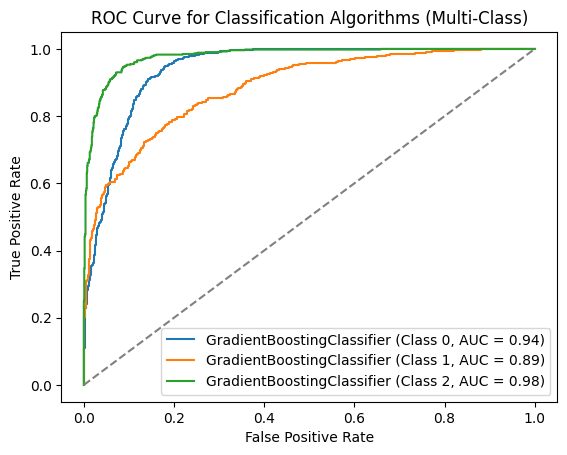

Accuracy for 1. fold: 0.8229
Accuracy for 2. fold: 0.8010
Accuracy for 3. fold: 0.8166
Accuracy for 4. fold: 0.8029
Accuracy for 5. fold: 0.7990
Cross Validation Mean Accuracy: 0.8085
--------------------------------------------------------------------

Evaluation for LogisticRegression:
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       518
           1       0.70      0.64      0.67       549
           2       0.85      0.88      0.86       531

    accuracy                           0.76      1598
   macro avg       0.76      0.76      0.76      1598
weighted avg       0.76      0.76      0.76      1598

Matthews Corrcoef:  0.6402
Accuracy Score:  0.7597


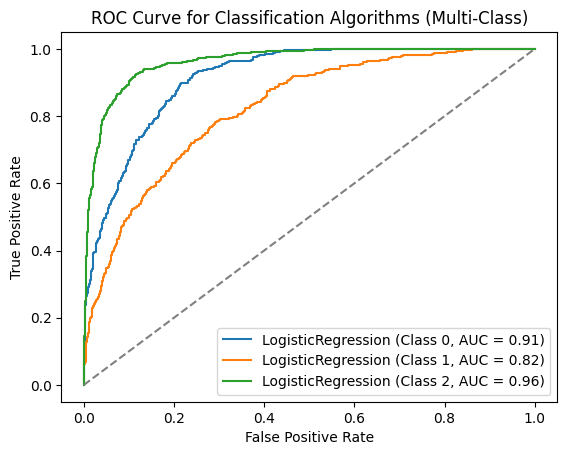

Accuracy for 1. fold: 0.7597
Accuracy for 2. fold: 0.7409
Accuracy for 3. fold: 0.7622
Accuracy for 4. fold: 0.7397
Accuracy for 5. fold: 0.7477
Cross Validation Mean Accuracy: 0.7500
--------------------------------------------------------------------

Evaluation for ExtraTreesClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       518
           1       0.81      0.73      0.77       549
           2       0.93      0.94      0.94       531

    accuracy                           0.84      1598
   macro avg       0.84      0.84      0.84      1598
weighted avg       0.84      0.84      0.84      1598

Matthews Corrcoef:  0.7565
Accuracy Score:  0.8367


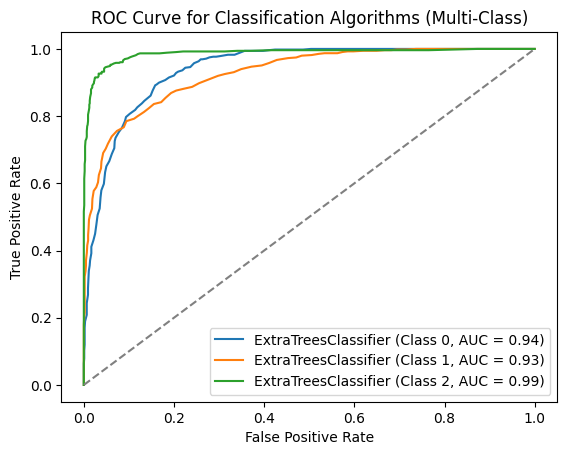

Accuracy for 1. fold: 0.8367
Accuracy for 2. fold: 0.8292
Accuracy for 3. fold: 0.8411
Accuracy for 4. fold: 0.8354
Accuracy for 5. fold: 0.8297
Cross Validation Mean Accuracy: 0.8344
--------------------------------------------------------------------

Evaluation for SVC:
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       518
           1       0.76      0.69      0.72       549
           2       0.90      0.92      0.91       531

    accuracy                           0.80      1598
   macro avg       0.80      0.80      0.80      1598
weighted avg       0.80      0.80      0.80      1598

Matthews Corrcoef:  0.7064
Accuracy Score:  0.8035


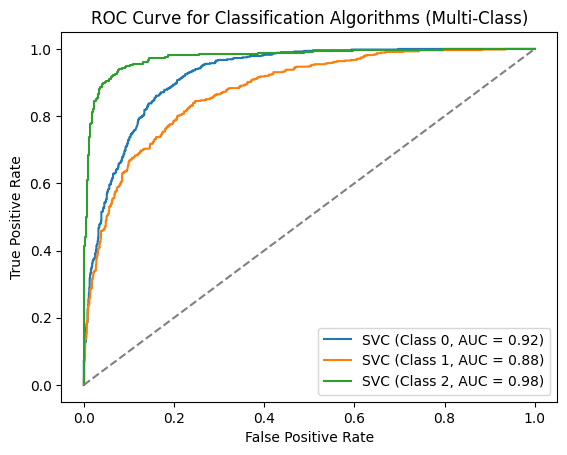

Accuracy for 1. fold: 0.8035
Accuracy for 2. fold: 0.7766
Accuracy for 3. fold: 0.7997
Accuracy for 4. fold: 0.7872
Accuracy for 5. fold: 0.7833
Cross Validation Mean Accuracy: 0.7901
--------------------------------------------------------------------

Evaluation for DecisionTreeClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.68      0.70       518
           1       0.65      0.66      0.65       549
           2       0.84      0.88      0.86       531

    accuracy                           0.74      1598
   macro avg       0.74      0.74      0.74      1598
weighted avg       0.74      0.74      0.74      1598

Matthews Corrcoef:  0.6067
Accuracy Score:  0.7378


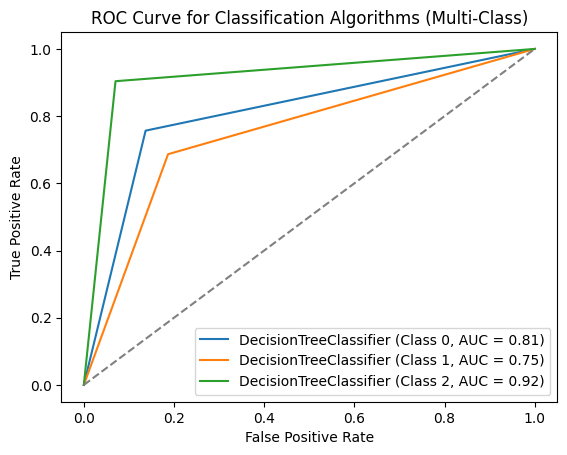

Accuracy for 1. fold: 0.7378
Accuracy for 2. fold: 0.7466
Accuracy for 3. fold: 0.7553
Accuracy for 4. fold: 0.7384
Accuracy for 5. fold: 0.7401
Cross Validation Mean Accuracy: 0.7436
--------------------------------------------------------------------

Evaluation for GaussianNB:
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.94      0.69       518
           1       0.51      0.08      0.13       549
           2       0.73      0.86      0.79       531

    accuracy                           0.62      1598
   macro avg       0.59      0.62      0.54      1598
weighted avg       0.59      0.62      0.53      1598

Matthews Corrcoef:  0.4820
Accuracy Score:  0.6158


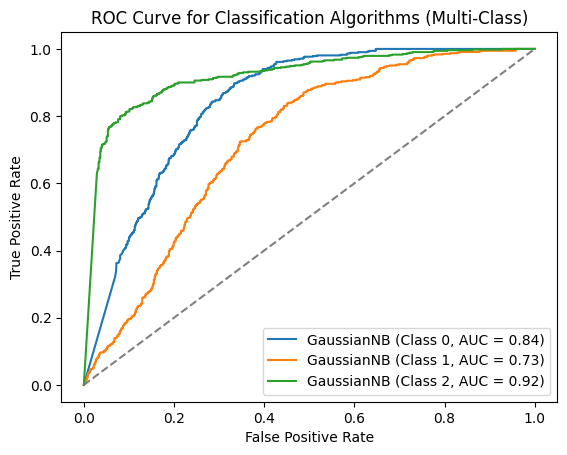

Accuracy for 1. fold: 0.6158
Accuracy for 2. fold: 0.6095
Accuracy for 3. fold: 0.6283
Accuracy for 4. fold: 0.6489
Accuracy for 5. fold: 0.6187
Cross Validation Mean Accuracy: 0.6242
--------------------------------------------------------------------

Evaluation for AdaBoostClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       518
           1       0.71      0.62      0.67       549
           2       0.84      0.88      0.86       531

    accuracy                           0.77      1598
   macro avg       0.77      0.77      0.77      1598
weighted avg       0.77      0.77      0.77      1598

Matthews Corrcoef:  0.6543
Accuracy Score:  0.7685


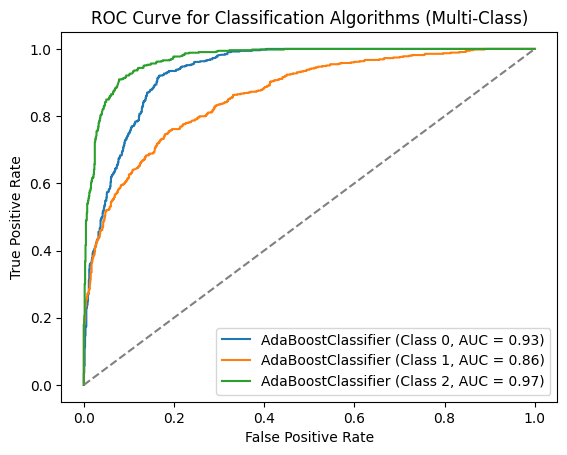

Accuracy for 1. fold: 0.7685
Accuracy for 2. fold: 0.7497
Accuracy for 3. fold: 0.7772
Accuracy for 4. fold: 0.7534
Accuracy for 5. fold: 0.7458
Cross Validation Mean Accuracy: 0.7589
--------------------------------------------------------------------

Evaluation for KNeighborsClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.57      0.64       518
           1       0.64      0.68      0.66       549
           2       0.82      0.94      0.88       531

    accuracy                           0.73      1598
   macro avg       0.73      0.73      0.72      1598
weighted avg       0.73      0.73      0.72      1598

Matthews Corrcoef:  0.5983
Accuracy Score:  0.7303


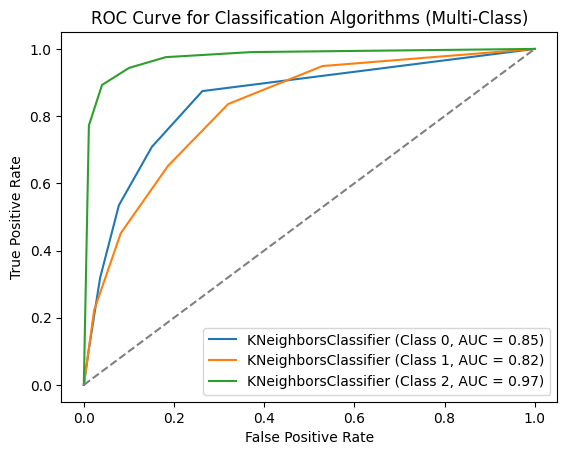

Accuracy for 1. fold: 0.7303
Accuracy for 2. fold: 0.7240
Accuracy for 3. fold: 0.7428
Accuracy for 4. fold: 0.7403
Accuracy for 5. fold: 0.7433
Cross Validation Mean Accuracy: 0.7361
--------------------------------------------------------------------

Evaluation for XGBClassifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       518
           1       0.83      0.72      0.77       549
           2       0.93      0.94      0.94       531

    accuracy                           0.84      1598
   macro avg       0.84      0.84      0.84      1598
weighted avg       0.84      0.84      0.84      1598

Matthews Corrcoef:  0.7642
Accuracy Score:  0.8411


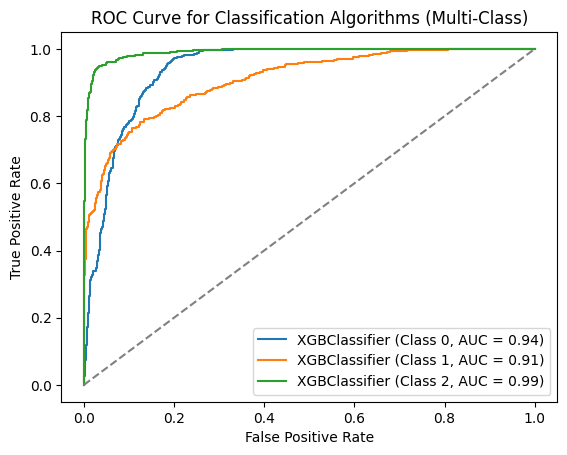

Accuracy for 1. fold: 0.8411
Accuracy for 2. fold: 0.8310
Accuracy for 3. fold: 0.8379
Accuracy for 4. fold: 0.8204
Accuracy for 5. fold: 0.8291
Cross Validation Mean Accuracy: 0.8319
--------------------------------------------------------------------


In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier


# List of classifiers
classifiers = [
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    LogisticRegression(random_state=42),
    ExtraTreesClassifier(random_state=42),
    SVC(random_state=42, probability= True),
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    KNeighborsClassifier(),
    XGBClassifier(random_state=42, num_class = 3)
]

for clf in classifiers:
    print(f"\nEvaluation for {clf.__class__.__name__}:")
    evaluatePerformance(clf)
    evaluatePerformance_crossVal(clf)
    print("--------------------------------------------------------------------")


Since our object in this project is achive highest accuracy score. I decided to further improve random forest classifier.

Without cross validaiton: 0.8404 with corss validation 0.8324(mean)

## Baseline model: Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

selected_classifier = RandomForestClassifier(n_estimators=300, random_state = 42) #lets change the n_estimators to higher number since we have so many features

## Feature Selection

### RFE

In [32]:
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [33]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score 

accuracy_score_list = []

for k in range(1, 71):
    RFE_selector = RFE(estimator=selected_classifier, n_features_to_select=k, step=10)
    RFE_selector.fit(X_train_v1, y_train_v1)
    
    sel_X_train_v1 = RFE_selector.transform(X_train_v1)
    sel_X_test_v1 = RFE_selector.transform(X_test_v1)
    
    selected_classifier.fit(sel_X_train_v1, y_train_v1)
    RFE_preds = selected_classifier.predict(sel_X_test_v1)

    accuracy = accuracy_score(y_test_v1, RFE_preds)
    
    
    accuracy_score_list.append(accuracy)

In [34]:
max_accuracy_index = accuracy_score_list.index(max(accuracy_score_list))
max_accuracy = accuracy_score_list[max_accuracy_index]
optimal_k_value = max_accuracy_index + 1  # Adding 1 because Python indexing starts from 0

# Print the results
print(f"Optimal k value: {optimal_k_value}")
print(f"Maximum Accuracy Score: {max_accuracy: .4f}")

Optimal k value: 34
Maximum Accuracy Score:  0.8529


Eventhough RFE is one of the best methods on top of that I also tired to find the best k value it didnt proivde any improvment to our accuracy score so ı will not use RFE.

### K-best features

In [35]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

accuracy_score_list = []

for k in range(1, 71):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_v2, y_train_v2)
    
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)
    
    selected_classifier.fit(sel_X_train_v2, y_train_v2)
    kbest_preds = selected_classifier.predict(sel_X_test_v2)
    
    accuracy = accuracy_score(y_test_v2, kbest_preds)
    
    
    accuracy_score_list.append(accuracy)

In [37]:
max_accuracy_index = accuracy_score_list.index(max(accuracy_score_list))
max_accuracy = accuracy_score_list[max_accuracy_index]
optimal_k_value = max_accuracy_index + 1  # Adding 1 because Python indexing starts from 0

# Print the results
print(f"Optimal k value: {optimal_k_value}")
print(f"Maximum Accuracy Score: {max_accuracy: .4f}")

Optimal k value: 39
Maximum Accuracy Score:  0.8498


### As can be seen RFE made a good improvement so let's transform the X_train and X_test

In [38]:
from sklearn.feature_selection import RFE
RFE_selector = RFE(estimator=selected_classifier, n_features_to_select=34, step=10)
RFE_selector.fit(X_train, y_train)

X_train = RFE_selector.transform(X_train)
X_test = RFE_selector.transform(X_test)

## Conculusion

After using RFE we reach 0.8529 accuracy in one train/test split. However we decided not to perform RFE in corss validation because the optimal k value we got was only for 1 train/test split and finding the optimal k value for each fold in corss validation would be to much time consuming due to our personal computers lack of performance.

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.83       518
           1       0.85      0.73      0.79       549
           2       0.92      0.94      0.93       531

    accuracy                           0.85      1598
   macro avg       0.85      0.85      0.85      1598
weighted avg       0.86      0.85      0.85      1598

Matthews Corrcoef:  0.7821
Accuracy Score:  0.8529


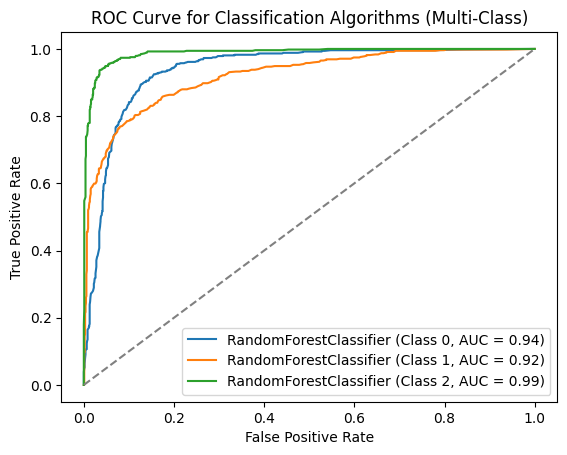

In [39]:
evaluatePerformance(selected_classifier)

In [40]:
evaluatePerformance_crossVal(selected_classifier)

Accuracy for 1. fold: 0.8404
Accuracy for 2. fold: 0.8279
Accuracy for 3. fold: 0.8423
Accuracy for 4. fold: 0.8348
Accuracy for 5. fold: 0.8247
Cross Validation Mean Accuracy: 0.8340


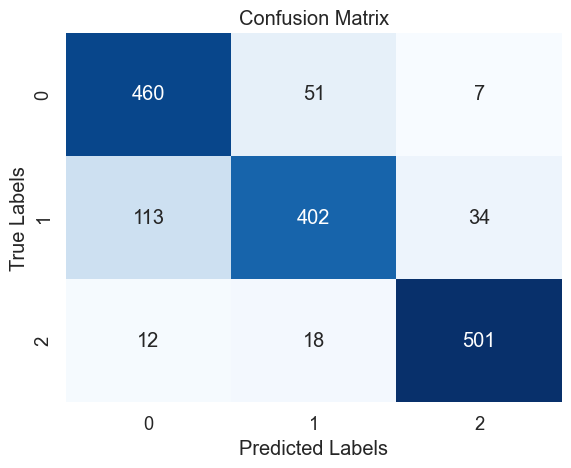

In [41]:
from sklearn.metrics import confusion_matrix

selected_classifier.fit(X_train, y_train)

y_pred = selected_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()